# Imports

In [1]:
# Python standard library
import sys

# Pore stats
sys.path.append('/home/prestonh/Desktop/Research/pore_stats/pore_stats/rp')
import resistive_pulse as rp
import rp_file

sys.path.append('/home/prestonh/Desktop/Research/pore_stats/pore_stats/oi')
import optical_imaging as oi
import oi_file

# Scientific computing
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage

# Cosmetic

In [2]:
sphere_red = np.array([189,63,63])/255.
b1_blue = np.array([32,65,148])/255.
b42_green = np.array([61, 183, 134])/255.

cmap = plt.get_cmap('viridis')

# Load data

In [3]:
base_path = '/home/prestonh/Desktop/Research/micropores/length_analysis/PET21/'
sphere_file_paths = ['PET21_410nm_0000_events.json']
b1_file_paths = ['PET21_rod_0000_events.json', 'PET21_rod_0001_events.json']
b42_file_paths = ['PET21_rod42_0002_events.json', 'PET21_rod42_0003_events.json', 'PET21_rod42_0004_events.json']



# Sphere events
sphere_sampling_rate = 20000.
sphere_events = []
sphere_files = []
for sphere_file_path in sphere_file_paths:
    
    new_sphere_events = rp_file.open_event_file_json(base_path + sphere_file_path)   
    sphere_events += new_sphere_events
    
    new_sphere_files = [sphere_file_path]*len(new_sphere_events)
    sphere_files += new_sphere_files
        
        
        
    

# B1 events
b1_sampling_rate = 10000.
b1_events = []
b1_files = []
for b1_file_path in b1_file_paths:
    
    new_b1_events = rp_file.open_event_file_json(base_path + b1_file_path)
    b1_events += new_b1_events
    
    new_b1_files = [b1_file_path]*len(new_b1_events)
    b1_files += new_b1_files



# B42 events
b42_sampling_rate = 10000.
b42_events = []
b42_files = []
for b42_file_path in b42_file_paths:
    
    new_b42_events = rp_file.open_event_file_json(base_path + b42_file_path)
    b42_events += new_b42_events
    
    new_b42_files = [b42_file_path]*len(new_b42_events)
    b42_files += new_b42_files

# Select 5 events

### Sphere

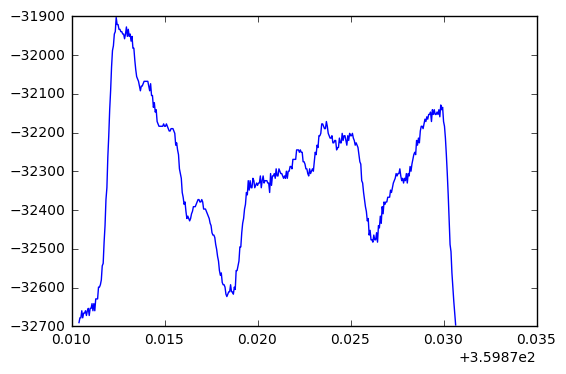

In [4]:
index = 4
plt.plot(sphere_events[index]._data[:,0], sphere_events[index]._data[:,1])
plt.show()

In [5]:
indices = [0,1,2,3,4]
sphere_events = [sphere_events[i] for i in indices]
sphere_files = [sphere_files[i] for i in indices]

### b1 rod

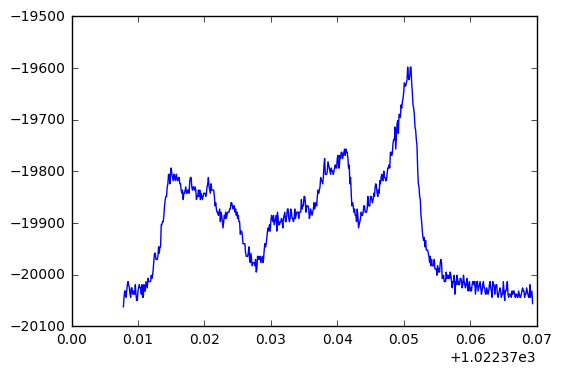

In [6]:
index = 6
plt.plot(b1_events[index]._data[:,0], b1_events[index]._data[:,1])
plt.show()

In [7]:
indices = [1,2,3,5,6]
b1_events = [b1_events[i] for i in indices]
b1_files = [b1_files[i] for i in indices]

### b42 rod

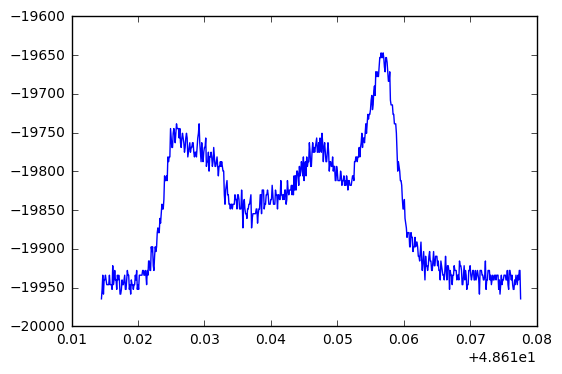

In [8]:
index = 0
plt.plot(b42_events[index]._data[:,0], b42_events[index]._data[:,1])
plt.show()

In [9]:
indices = [1,2,3,4,15]
b42_events = [b42_events[i] for i in indices]
b42_files = [b42_files[i] for i in indices]

# Get velocities

In [10]:
def filter_data(data, sigma = 50):
    filtered_data = np.copy(data)
    filtered_data[:,1] = scipy.ndimage.filters.gaussian_filter(filtered_data[:,1], sigma)
    return filtered_data

In [11]:
def get_min_indices(data):
    maxima, minima = rp.get_maxima_minima(data[:,1])
    
    
    return minima

In [12]:
filter_sigmas = [15,35,35]

### Test filter sigma and get velocities

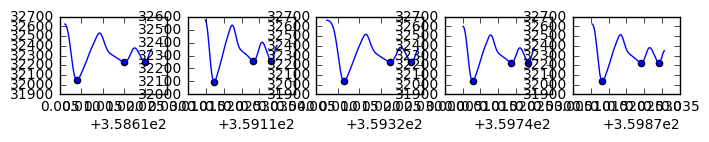

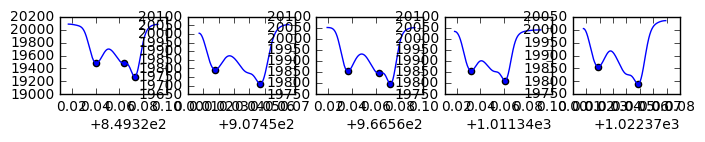

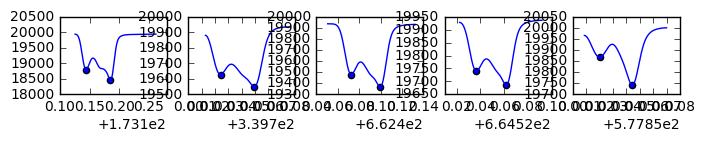

sphere [0.015900000000000001, 0.016049999999999998, 0.01575, 0.015650000000000001, 0.015900000000000001]
b1 [0.032199999999999999, 0.029499999999999998, 0.035799999999999998, 0.028400000000000002, 0.029700000000000001]
b42 [0.041000000000000002, 0.0252, 0.0269, 0.025000000000000001, 0.024500000000000001]


In [13]:
# Spheres
sphere_dts = []
sphere_minimas = []

fig,axes = plt.subplots(1,5, figsize = (8,1))
for i, event in enumerate(sphere_events):
    plt.sca(axes[i])
    filtered_data = filter_data(event._data, filter_sigmas[0])
    filtered_data[:,1] *= -1
    minima = get_min_indices(filtered_data)
    plt.plot(filtered_data[:,0], filtered_data[:,1])
    for minimum in minima:
        plt.scatter(filtered_data[minimum,0], filtered_data[minimum,1])
    
    
    sphere_dts.append((minima[-1]-minima[0])/sphere_sampling_rate)
    sphere_minimas.append([minima[0], minima[-1]])
    
plt.show()


# b1
b1_dts = []
b1_minimas = []

fig,axes = plt.subplots(1,5, figsize = (8,1))
for i, event in enumerate(b1_events):
    plt.sca(axes[i])
    filtered_data = filter_data(event._data, filter_sigmas[1])
    filtered_data[:,1] *= -1
    minima = get_min_indices(filtered_data)
    plt.plot(filtered_data[:,0], filtered_data[:,1])
    for minimum in minima:
        plt.scatter(filtered_data[minimum,0], filtered_data[minimum,1])
    
    
    b1_dts.append((minima[-1]-minima[0])/b1_sampling_rate)
    b1_minimas.append([minima[0], minima[-1]])
    
plt.show()



# b42
b42_dts = []
b42_minimas = []

fig,axes = plt.subplots(1,5, figsize = (8,1))
for i, event in enumerate(b42_events):
    plt.sca(axes[i])
    filtered_data = filter_data(event._data, filter_sigmas[2])
    filtered_data[:,1] *= -1
    minima = get_min_indices(filtered_data)
    plt.plot(filtered_data[:,0], filtered_data[:,1])
    for minimum in minima:
        plt.scatter(filtered_data[minimum,0], filtered_data[minimum,1])
    
    
    b42_dts.append((minima[-1]-minima[0])/b42_sampling_rate)
    b42_minimas.append([minima[0], minima[-1]])
    
plt.show()


print 'sphere', sphere_dts
print 'b1', b1_dts
print 'b42', b42_dts

# Extend data

In [14]:
# Sphere
print 'sphere'

extend_length = 500

for i, sphere_event in enumerate(sphere_events):
    print '\t', i
    
    
    # Load in full data set
    sphere_file = sphere_files[i]    
    data = rp_file.get_data((base_path + sphere_file).replace('_events.json', '.abf'))

    # Get new indices
    i0 = sphere_minimas[i][0]
    i1 = sphere_minimas[i][1]
    
    j0 = int(1.*sphere_event._data[i0,0]*sphere_sampling_rate)
    j1 = int(1.*sphere_event._data[i1,0]*sphere_sampling_rate)
    
    new_j0 = j0 - extend_length
    new_j1 = j1 + extend_length
    
    sphere_event._data = np.copy(data[new_j0:new_j1+1,:])
    sphere_event._data[:,1] *= -1
    sphere_minimas[i][0] += extend_length
    sphere_minimas[i][1] += extend_length
    
    
# b1
print 'b1'

extend_length = 500

for i, b1_event in enumerate(b1_events):
    print '\t', i
    
    # Load in full data set
    b1_file = b1_files[i]    
    data = rp_file.get_data((base_path + b1_file).replace('_events.json', '.abf'))

    # Get new indices
    i0 = b1_minimas[i][0]
    i1 = b1_minimas[i][1]
    
    j0 = int(1.*b1_event._data[i0,0]*b1_sampling_rate)
    j1 = int(1.*b1_event._data[i1,0]*b1_sampling_rate)
    
    new_j0 = j0 - extend_length
    new_j1 = j1 + extend_length
    
    b1_event._data = np.copy(data[new_j0:new_j1+1,:])
    b1_event._data[:,1] *= -1
    b1_minimas[i][0] += extend_length
    b1_minimas[i][1] += extend_length
    
    
# b42
print 'b42'

extend_length = 500

for i, b42_event in enumerate(b42_events):
    print '\t', i
    
    # Load in full data set
    b42_file = b42_files[i]    
    data = rp_file.get_data((base_path + b42_file).replace('_events.json', '.abf'))

    # Get new indices
    i0 = b42_minimas[i][0]
    i1 = b42_minimas[i][1]
    
    j0 = int(1.*b42_event._data[i0,0]*b42_sampling_rate)
    j1 = int(1.*b42_event._data[i1,0]*b42_sampling_rate)
    
    new_j0 = j0 - extend_length
    new_j1 = j1 + extend_length
    
    b42_event._data = np.copy(data[new_j0:new_j1+1,:])
    b42_event._data[:,1] *= -1
    b42_minimas[i][0] += extend_length
    b42_minimas[i][1] += extend_length

sphere
	0
	1
	2
	3
	4
b1
	0
	1
	2
	3
	4
b42
	0
	1
	2
	3
	4


### Test extension

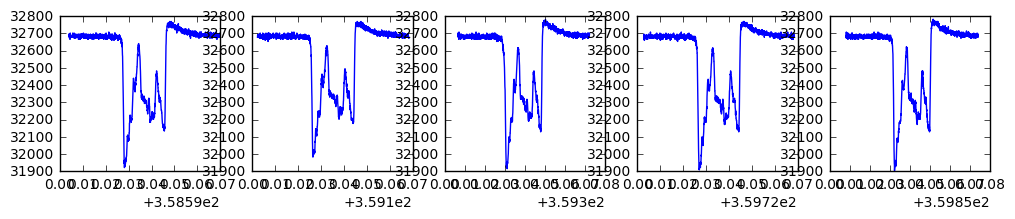

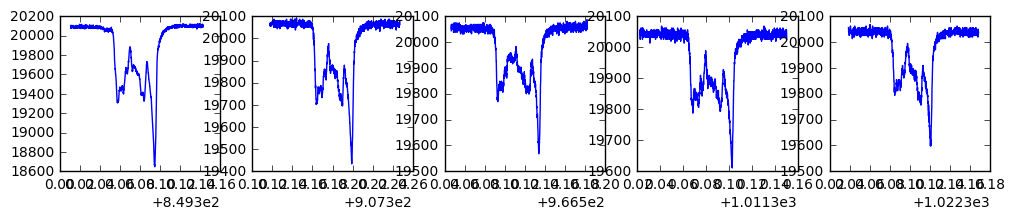

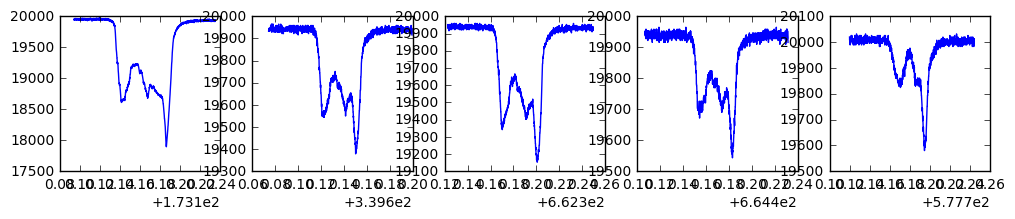

In [15]:
# Sphere
fig, axes = plt.subplots(1,5, figsize = (12,2))
for i in range(len(sphere_events)):
    fig.sca(axes[i])
    plt.plot(sphere_events[i]._data[:,0], sphere_events[i]._data[:,1])
plt.show()

# B1
fig, axes = plt.subplots(1,5, figsize = (12,2))
for i in range(len(b1_events)):
    fig.sca(axes[i])
    plt.plot(b1_events[i]._data[:,0], b1_events[i]._data[:,1])
plt.show()

# B42
fig, axes = plt.subplots(1,5, figsize = (12,2))
for i in range(len(b42_events)):
    fig.sca(axes[i])
    plt.plot(b42_events[i]._data[:,0], b42_events[i]._data[:,1])
plt.show()

sphere
0
1
2
3
4
b1
0
1
2
3
4
b42
0
1
2
3
4


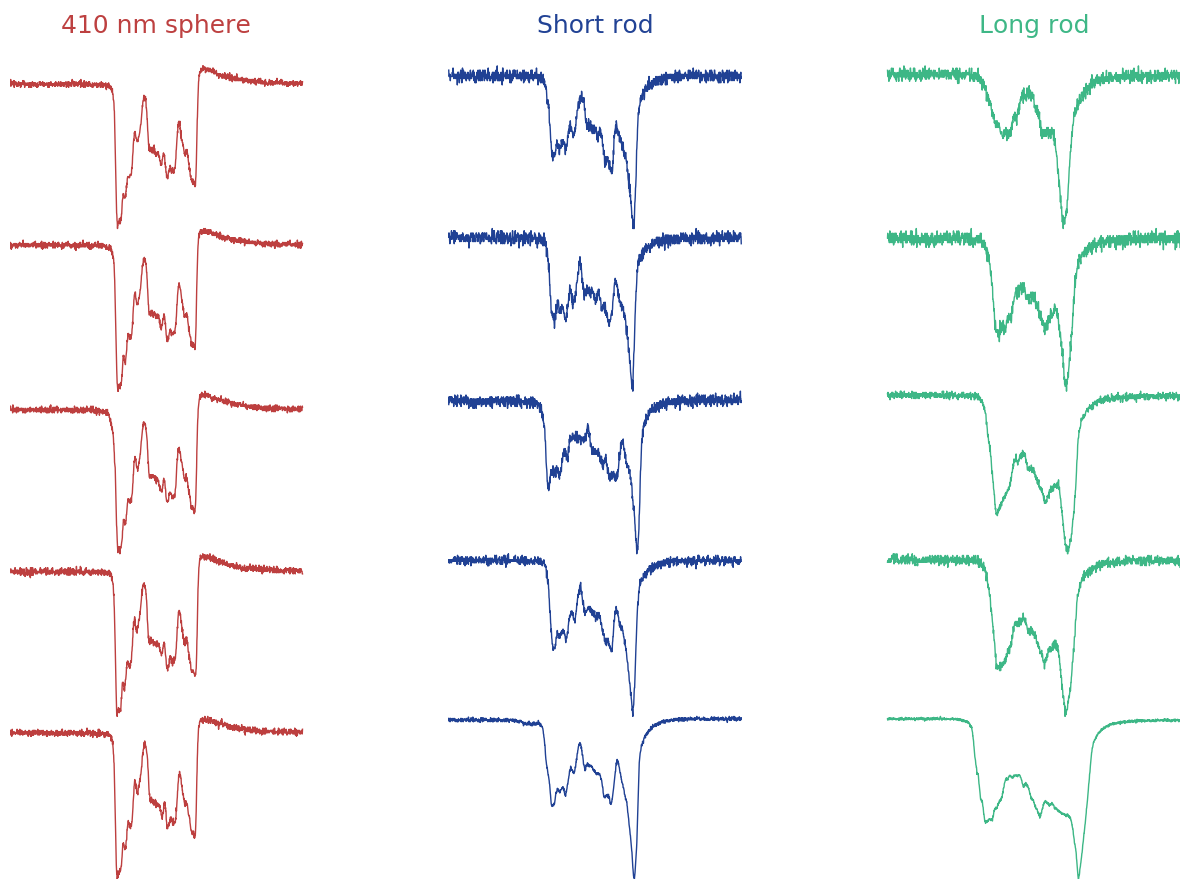

In [16]:
fig = plt.figure(figsize = (12,9))


xoffset = 1.5
yoffset = 1


print 'sphere'
for i in range(5):
    print i
    event = sphere_events[i]
    data = np.copy(event._data)
    data[:,0] = data[:,0] - data[0,0]
    data[:,0] = data[:,0]/np.max(data[:,0])
    
    data[:,1] = data[:,1] - np.min(data[:,1])
    data[:,1] = data[:,1]/np.max(data[:,1])
    
    
    
    
    plt.plot(data[:,0], data[:,1] + i*yoffset, color = sphere_red)

    
print 'b1'
for i in range(5):
    print i

    event = b1_events[i]
    data = np.copy(event._data)
    
    
    data[:,0] = data[:,0] - data[0,0]
    
    data[:,0] = data[:,0]/np.max(data[:,0])

    data[:,1] = data[:,1] - np.min(data[:,1])
    data[:,1] = data[:,1]/np.max(data[:,1])    
    
    plt.plot(data[:,0]+xoffset, data[:,1] + i*yoffset, color = b1_blue)

    
    
    
print 'b42'
for i in range(5):
    print i
    event = b42_events[i]
    data = np.copy(event._data)
    data[:,0] = data[:,0] - data[0,0]
    data[:,0] = data[:,0]/np.max(data[:,0])
    
    data[:,1] = data[:,1] - np.min(data[:,1])
    data[:,1] = data[:,1]/np.max(data[:,1])
    

    
    plt.plot(data[:,0]+2*xoffset, data[:,1] + i*yoffset, color = b42_green)
    
    
    
# Text
plt.text(0.5, 5.25, r'410 nm sphere', size = 18, color = sphere_red, ha = 'center', va = 'center')

plt.text(2, 5.25, r'Short rod', size = 18, color = b1_blue, ha = 'center', va = 'center')

plt.text(3.5, 5.25, r'Long rod', size = 18, color = b42_green, ha = 'center', va = 'center')


# Cosmetics
for key in plt.gca().spines.keys():
    plt.gca().spines[key].set_visible(False)
    
plt.xticks([])
plt.yticks([])
    
plt.ylim(0, 5.35)
    
fig.tight_layout()
    
    
    
plt.savefig('PET21_raw.png', dpi = 300)
    
plt.show()

# Moving average

sphere
0
1
2
3
4
b1
0
[736, 1058]
1
[605, 900]
2
[675, 1033]
3
[639, 923]
4
[611, 908]
b42
0
1
2
3
4


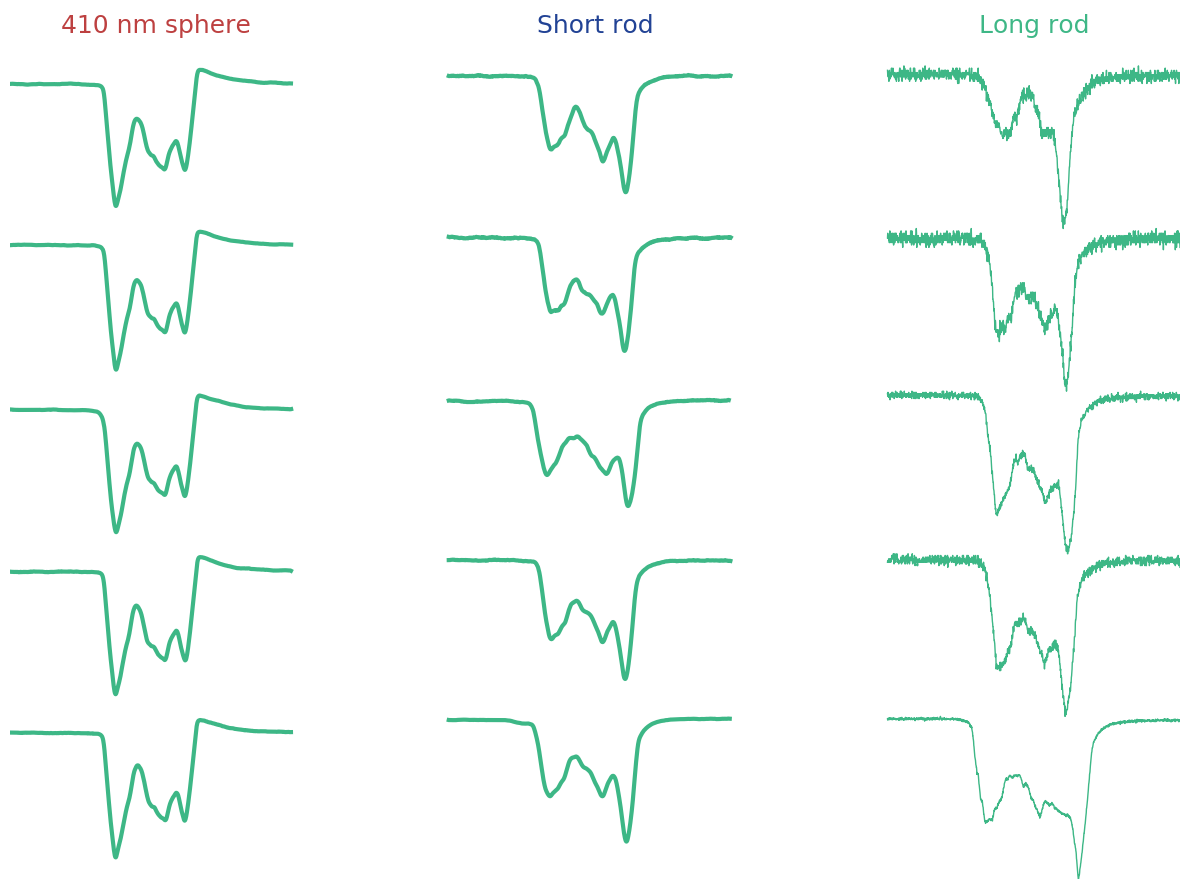

In [17]:
fig = plt.figure(figsize = (12,9))


xoffset = 1.5
yoffset = 1
minor_offset = -.5


print 'sphere'
for i in range(5):
    print i
    event = sphere_events[i]
    data = np.copy(event._data)
    data[:,0] = data[:,0] - data[0,0]
    data[:,0] = data[:,0]/np.max(data[:,0])
    
    data[:,1] = data[:,1] - np.min(data[:,1])
    data[:,1] = data[:,1]/np.max(data[:,1])
    
    # Moving average
    cumsum_vec = np.cumsum(np.insert(data[:,1], 0, 0))
    window_width = int((sphere_minimas[i][1]-sphere_minimas[i][0])/6.)
    averaged_data = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
    
    
    #plt.plot(data[:,0], data[:,1] + i*yoffset, color = sphere_red)
    plt.plot(data[:averaged_data.shape[0],0], averaged_data + i*yoffset, color = b42_green, lw = 3)

    
print 'b1'
for i in range(5):
    print i

    event = b1_events[i]
    data = np.copy(event._data)
    
    
    data[:,0] = data[:,0] - data[0,0]
    
    data[:,0] = data[:,0]/np.max(data[:,0])

    data[:,1] = data[:,1] - np.min(data[:,1])
    data[:,1] = data[:,1]/np.max(data[:,1])    
    
    # Moving average
    cumsum_vec = np.cumsum(np.insert(data[:,1], 0, 0))
    window_width = int((b1_minimas[i][1]-b1_minimas[i][0])/6.)
    print b1_minimas[i]
    averaged_data = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
    
    #plt.plot(data[:,0] + 1*xoffset, data[:,1] + i*yoffset, color = b1_blue)
    plt.plot(data[:averaged_data.shape[0],0]+1*xoffset, averaged_data + i*yoffset, color = b42_green, lw = 3)

    
    
    
print 'b42'
for i in range(5):
    print i
    event = b42_events[i]
    data = np.copy(event._data)
    data[:,0] = data[:,0] - data[0,0]
    data[:,0] = data[:,0]/np.max(data[:,0])
    
    data[:,1] = data[:,1] - np.min(data[:,1])
    data[:,1] = data[:,1]/np.max(data[:,1])
    

    
    plt.plot(data[:,0]+2*xoffset, data[:,1] + i*yoffset, color = b42_green)
    
    
    
# Text
plt.text(0.5, 5.25, r'410 nm sphere', size = 18, color = sphere_red, ha = 'center', va = 'center')

plt.text(2, 5.25, r'Short rod', size = 18, color = b1_blue, ha = 'center', va = 'center')

plt.text(3.5, 5.25, r'Long rod', size = 18, color = b42_green, ha = 'center', va = 'center')


# Cosmetics
for key in plt.gca().spines.keys():
    plt.gca().spines[key].set_visible(False)
    
plt.xticks([])
plt.yticks([])
    
plt.ylim(0, 5.35)
    
fig.tight_layout()
    
    
    
#plt.savefig('PET21_averaged.png', dpi = 300)
    
plt.show()

# DTW

In [18]:
def get_distance_DTW(a_i, b_i):
    distance_ = ((a_i - b_i)**2.0)**0.5
    return distance_




def get_distance_matrix_DTW(a, b):
    distance_matrix_ = np.zeros((len(a), len(b)))
    for i in range(0, distance_matrix_.shape[0]):
        for j in range(0, distance_matrix_.shape[1]):
            distance_matrix_[i,j] = get_distance_DTW(a[i], b[j])

    return distance_matrix_

def get_distance_DDTW(a, i, b, j):
    #a,b are 1-D numpy arrays
    #i, j are indices of elements we want distance between

    if i == a.shape[0]-1:
        d_a = (a[i]-a[i-1]+(a[0]-a[i-1]/2.0)/2.0)
    else:
        d_a = (a[i] - a[i-1] + (a[i+1] - a[i-1])/2.0)/2.0

    if j == b.shape[0]-1:
        d_b = (b[j] - b[j-1]+(b[0] - b[j-1]/2.0)/2.0)
    else:
        d_b = (b[j] - b[j-1] + (b[j+1] - b[j-1])/2.0)/2.0

    distance_ = ((d_a - d_b)**2.0)**0.5
    return distance_



def get_distance_matrix_DDTW(a, b):
    distance_matrix_ = np.zeros((a.shape[0], b.shape[0]))
    for i in range(0, distance_matrix_.shape[0]):
        for j in range(0, distance_matrix_.shape[1]):
            distance_matrix_[i,j] = get_distance_DDTW(a, i, b, j)

    return distance_matrix_



def get_cost_matrix(distance_matrix_, h_wt_ = 1, v_wt_ = 1, d_wt_ = 1):
    infinity = 2.0**32.0
    cost_matrix_ = infinity*np.zeros((distance_matrix_.shape[0], distance_matrix_.shape[1]))

    for i in range(0, cost_matrix_.shape[0]):
        for j in range(0, cost_matrix_.shape[1]):
            if i == 0 and j == 0:
                cost_matrix_[i,j] = distance_matrix_[i,j]
            else:
                if i == 0:
                    cost_matrix_[i,j] = distance_matrix_[i,j] + v_wt_*cost_matrix_[i,j-1]
                elif j == 0:
                    cost_matrix_[i,j] = distance_matrix_[i,j] + h_wt_*cost_matrix_[i-1,j]

                else: cost_matrix_[i,j] = min(h_wt_*distance_matrix_[i,j] + cost_matrix_[i-1,j],\
                    v_wt_*distance_matrix_[i,j] + cost_matrix_[i,j-1],\
                    d_wt_*distance_matrix_[i,j] + cost_matrix_[i-1,j-1])

    return cost_matrix_



def get_warp_path(cost_matrix_):
    
    warp_path = np.array(([[cost_matrix.shape[0]-1, cost_matrix.shape[1]-1]]))
    
    i = warp_path[0,0]
    j = warp_path[0,1]

    while(i > 0 or j > 0):
        if i == 0:
            j = j - 1
        elif j == 0:
            i = i - 1

        else:
            if min(cost_matrix_[i-1, j], cost_matrix_[i-1, j-1], cost_matrix_[i,j-1]) == cost_matrix_[i-1, j]:
                i = i - 1
            elif min(cost_matrix_[i-1, j], cost_matrix_[i-1, j-1], cost_matrix_[i, j-1]) == cost_matrix_[i-1, j-1]:
                i = i - 1
                j = j - 1
            elif min(cost_matrix_[i-1, j], cost_matrix_[i-1, j-1], cost_matrix_[i,j-1]) == cost_matrix_[i, j-1]:
                j = j - 1

        warp_path = np.vstack((warp_path, np.array([[i,j]])))

    return warp_path

In [19]:


# b42
signal_2 = np.copy(b42_events[1]._data[:,1])
signal_2 = signal_2[200:-200]
signal_2 = signal_2 - np.min(signal_2)
signal_2 = signal_2/np.max(signal_2)

In [20]:
def moving_average(signal_data, window_width):
    cumsum_vec = np.cumsum(np.insert(signal_data, 0, 0))
    averaged_data = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
    return averaged_data

In [21]:
lengths = [1, 1.4, 1.8, 2, 2.2, 2.6, 3]

b42 event 0
b1 event  0


/home/prestonh/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


b1 event  1
b1 event  2
b1 event  3
b1 event  4
b42 event 1
b1 event  0
b1 event  1
b1 event  2
b1 event  3
b1 event  4
b42 event 2
b1 event  0
b1 event  1
b1 event  2
b1 event  3
b1 event  4
b42 event 3
b1 event  0
b1 event  1
b1 event  2
b1 event  3
b1 event  4
b42 event 4
b1 event  0
b1 event  1
b1 event  2
b1 event  3
b1 event  4


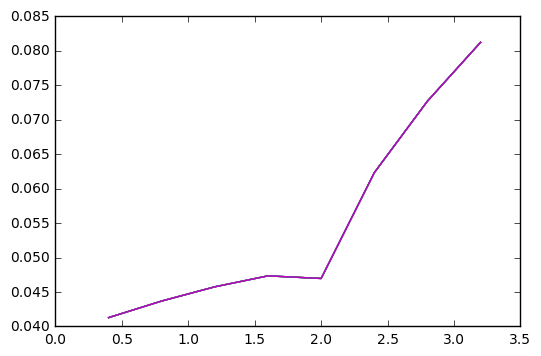

In [28]:
for i in range(len(b42_events)):
    print 'b42 event', i
    
    # b42
    signal_2 = np.copy(b42_events[1]._data[:,1])
    signal_2 = signal_2[200:-200]
    signal_2 = signal_2 - np.min(signal_2)
    signal_2 = signal_2/np.max(signal_2)
    
    costs = [0 for i in range(len(lengths))]

    for j in range(len(b1_events)):
        print 'b1 event ', j

        # b1
        b1_index = 0

        signal_1_raw = np.copy(b1_events[j]._data[:,1])
        signal_1_raw = signal_1_raw[100:-100]
        signal_1_raw = signal_1_raw - np.min(signal_1_raw)
        signal_1_raw = signal_1_raw/np.max(signal_1_raw)

        for k, length in enumerate(lengths):
            window_width = b1_dts[b1_index]*b1_sampling_rate*length/12.
            signal_1 = moving_average(np.copy(signal_1_raw), window_width)



            distance_matrix = get_distance_matrix_DDTW(signal_1, signal_2)

            cost_matrix = get_cost_matrix(distance_matrix)

            warp_path = get_warp_path(cost_matrix)

            cost = 0
            for ele in warp_path:
                cost = cost + (signal_1[ele[0]] - signal_2[ele[1]])**2.
            cost = cost/len(warp_path)


            costs[k] += cost
    plt.plot(lengths, costs)
plt.show()

In [ ]:
print costs

In [ ]:
fig = plt.figure(figsize = ((6,8)))

plt.plot(signal_1, color = 'gray')

offset = 1
plt.plot(signal_2 + offset, color = cmap(0))

for i, ele in enumerate(warp_path):
    if i %50 == 0:
        if i % 100 == 0:
            ls = '--'
        else:
            ls = '-'
        plt.plot([ele[0], ele[1]], [signal_1[ele[0]], signal_2[ele[1]] + offset], c = 'k', ls = ls)
        
        
for key in plt.gca().spines.keys():
    plt.gca().spines[key].set_visible(False)
    
plt.xticks([])
plt.yticks([])
        
        
plt.xlim(0,1500)
    
#plt.savefig('dtw_matching.png', dpi = 100)
    
plt.show()